##### 순열(Permutation)
- 순열이란 서로 다른 n개에서 r개를 선택할 때 순서를 고려하여 선택한 경우의 수를 나열하는 방법이다. 
- 보통 Permutation의 첫 글자 P를 따서 nPr로 표현하며 계산식은 아래와 같이 쓸 수 있다. 0 ≦ r ≦ n
- nPr = n x (n-1) x (n-2) x (n-3) x …… x (n-r+1) <br>
※ n부터 (n-r+1)까지 곱해지는 수는 총 r개

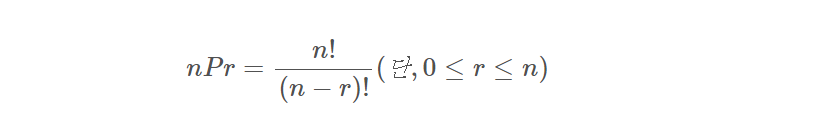

- 예: 각 카드에는 A, B, C, D가 써져 있는데 이 중에서 순서를 고려하여 2장을 뽑고 싶다고 하자.<br> 
공식에 따르면 4P2 = 4 x 3 = 12 혹은 4P2 = 4! / (4-2)! = 4 x 3 x 2 x 1 / 2 x 1 = 4 x 3 = 12 이므로 총 12개의 경우의 수가 나올 것이라 생각할 수 있다. 
- 실제로 2장을 뽑은 결과를 나열하면 다음과 같다.
    - AB, AC, AD
    - BA, BC, BD
    - CA, CB, CD
    - DA, DB, DC <br><br>
- 여기서 순서를 고려한다는 것은, AB와 BA를 서로 다른 것이라고 여기는 것을 의미한다.

In [15]:
# 재귀함수를 이용한 순열 구현

def perm(arr, r):
    result = []         # 결과를 담을 리스트
    if r > len(arr):    # r이 len(arr)보다 크면 안됨
        return result  
    
    if r == 1:          # r이 1이면 arr의 원소를 각각 리스트에 담아줌(1 => 1장씩 뽑는 경우의 수)
        for i in arr:
            result.append([i])
    elif r > 1:
        for i in range(len(arr)): # arr의 원소를 하나씩 뽑아서
            temp = [i for i in arr] # arr의 원소를 담은 리스트를 만들기
            temp.remove(arr[i])     # 뽑은 원소를 제거
            for p in perm(temp, r-1): # 재귀함수를 이용해 나머지 원소들로 순열을 구함
                result.append([arr[i]] + p) # 뽑은 원소와 나머지 원소들의 순열을 합쳐서 result에 담음
    return result

arr = ['A', 'B', 'C', 'D']
print(perm(arr, 2))

[['A', 'B'], ['A', 'C'], ['A', 'D'], ['B', 'A'], ['B', 'C'], ['B', 'D'], ['C', 'A'], ['C', 'B'], ['C', 'D'], ['D', 'A'], ['D', 'B'], ['D', 'C']]


In [9]:
# AB, BA 확인
arr = ['A', 'B', 'C', 'D']
r = 2

sel = [0] * r    # 결과들이 저장될 리스트
check = [0] * r  # 해당 원소를 이미 사용했는지 안했는지에 대한 체크

def perm(idx):
    # 다 뽑아서 정리했다면
    if idx == r:  
        print(sel)
        return

    for i in range(r):  # 해당 자리에 가능한 모든 수에 대해 시도    
        if check[i] == 0:
            sel[idx] = arr[i]
            check[i] = 1       # 사용했다는 표시
            perm(idx + 1)      # 다음 자리 순열 뽑으러 이동
            check[i] = 0       # 다음 반복문을 위한 원상복구
            
perm(0)

['A', 'B']
['B', 'A']


##### 조합(Combination)
- 조합이란 서로다른 n개에서 r개를 선택하는 경우의 수이다. 
- 즉 순열은 r개를 선택하고 이걸 나열하는 경우를 모두 고려한다면 조합은 r개를 선택만 하는 경우의 수를 구하는 것이다.
-  보통 Combination의 첫 글자 C를 따서 nCr로 표현한다.
- 순열을 조합을 이용해 표현해 보면 조합을 계산할 수 있다.
    - nPr =  nCr X r! = (r개를 선택하는 경우의 수) X (r개를 나열하는 경우의 수)
    - nCr = n x (n-1) x (n-2) x …… x (n-r+1) / r x (r-1) x (r-2) x …… x 2 x 1

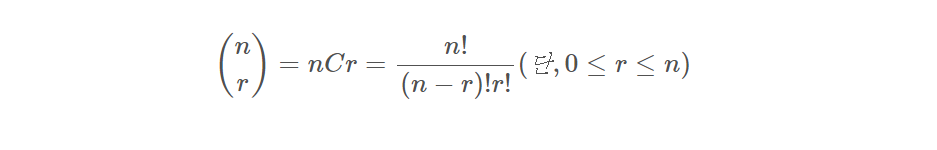

-  앞의 카드를 이용하여 계산한다고 가정하며 이번에는 순서를 고려하지 않고 경우의 수를 세어 본다.
    - 공식에 따르면 4C2 = 4 x 3 / 2 x 1 = 6 혹은 4C2 = 4! / 2!(4-2)! = 4 x 3 x 2 x 1 / 2 x 1 x 2 x 1 = 6 이므로 총 6개의 경우의 수가 나올 것이라 생각할 수 있다.

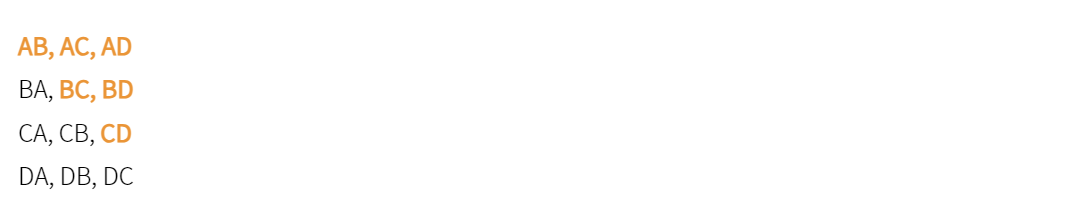

- 순열과 조합의 차이를 한 눈에 알아볼 수 있게 순열의 결과물에서 제외된 카드 세트를 회색으로 표시하였다.
- 이렇듯 조합에서는 순열과 달리 AB와 BA를 서로 같은 것이라고 여기는 특징이 있다.

In [10]:
# 재귀함수 이용한 조합

def comb(arr, r):
    result = []      # 결과를 담을 리스트
    if r > len(arr): # r이 arr의 길이보다 크면 조합이 될 수 없으므로 종료
        return result
    
    if r == 1:      # r이 1이면 arr의 원소들을 각각 리스트에 담아서 반환    
        for i in arr:
            result.append([i])
            
    elif r > 1:
        for i in range(len(arr)- r + 1):          # 리스트의 길이에서 r을 뺀 만큼 반복 
            for temp in comb(arr[i+1:], r-1):     # 재귀함수를 이용하여 r-1개의 조합을 만들고
                result.append([arr[i]] + temp)    # i번째 원소와 합쳐서 결과리스트(result)에 추가
    return result


arr = ['A', 'B', 'C', 'D']
comb(arr, 2)

[['A', 'B'], ['A', 'C'], ['A', 'D'], ['B', 'C'], ['B', 'D'], ['C', 'D']]

##### Python 모듈, itertools

In [13]:
import itertools as its

arr = ['A', 'B', 'C', 'D']

premute = list(its.permutations(arr, 2))   # 2개의 원소로 순열 만들기
combi = list(its.combinations(arr, 2))     # 2개의 원소로 조합 만들기

print(premute)
print()
print(combi)

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'A'), ('D', 'B'), ('D', 'C')]

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]


##### [문제] 순열의 순서 구하기

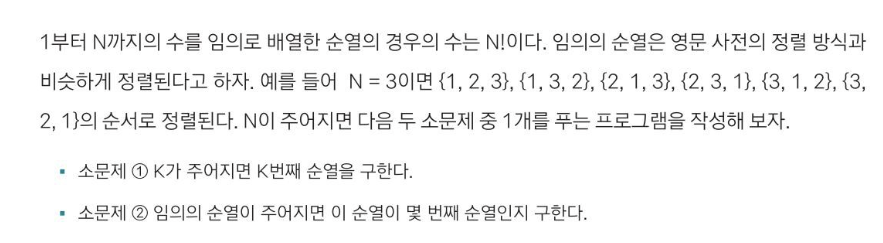

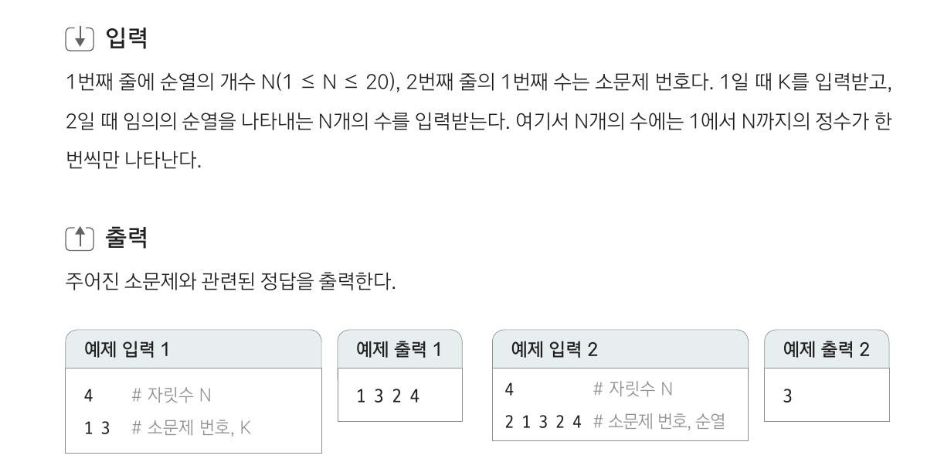

##### 문제 풀이

1. 자릿수에 따른 순열의 경우의 수를 1부터 N자리까지 미리 계산한다.

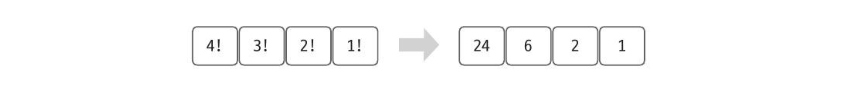

2. 소문제 ①을 풀어 보겠습니다. 예제 1을 이용해 K번째 순열을 출력한다.

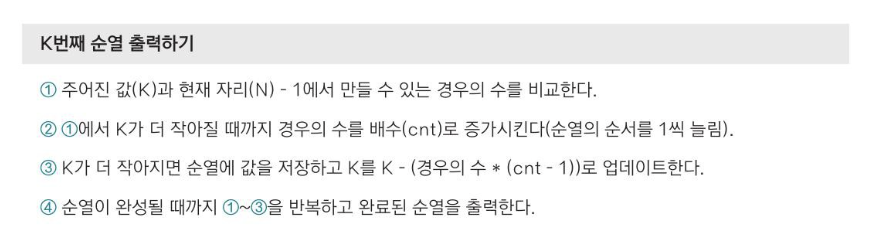

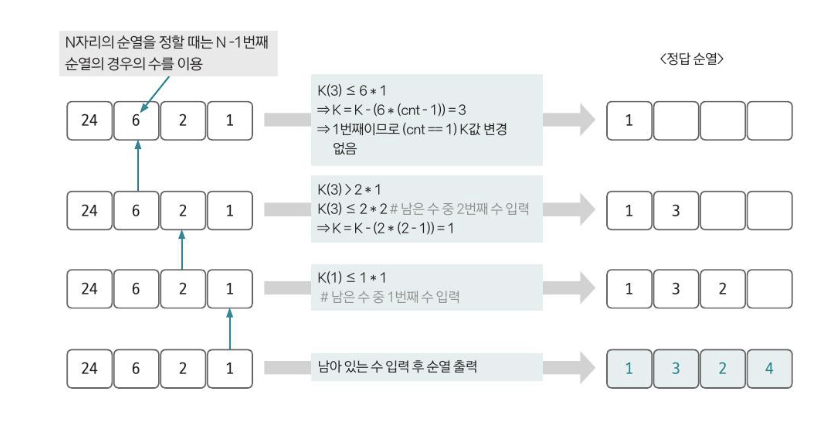

3. 소문제 ②를 풀어 보겠습니다. 예제 2를 이용해 입력된 순열의 순서 K를 구한다.

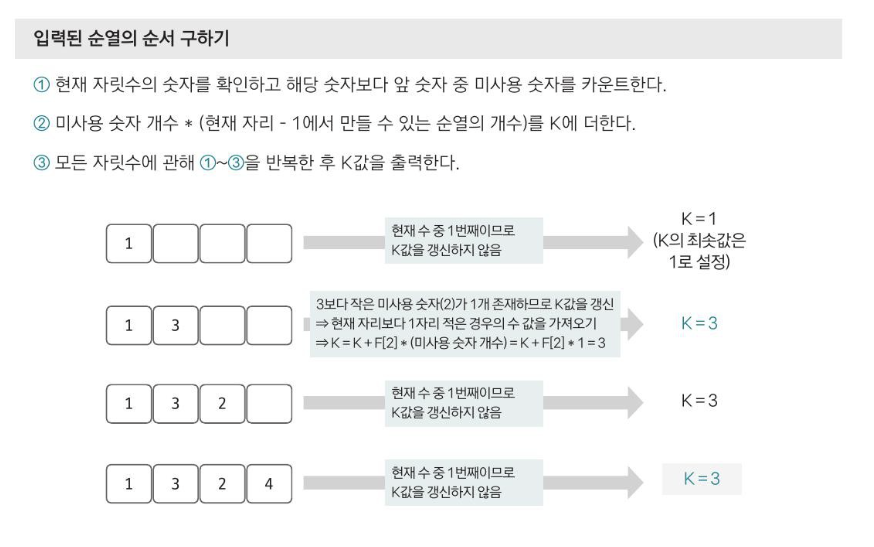

In [23]:
# 코드 입력

# 팩토리얼 저장 리스트(자리별로 만들수 있는 경우의 수 저장)
F = [0] * 21
S = [0] * 21  # 순열 저장 리스트

visited = [False] * 21  # 방문 여부 저장 리스트

n = int(input())  # n 입력
F[0] = 1 

for i in range(1, n + 1):
    F[i] = F[i - 1] * i  # 팩토리얼 계산
    
# 사용자로 부터 계산할 방법 입력(1: 순열, 2: 조합)
input_list = list(map(int, input().split()))

if input_list[0] == 1:  # 순열
    k = input_list[1]  # k 입력
    for i in range(1, n+1):  # 순열 계산
        cnt = 1              # cnt: 현재 자리에 올 수 있는 경우의 수
        for j in range(1, n+1):      # j: 현재 자리에 올 수 있는 수
            if visited[j] == True:   # 이미 방문한 수라면 넘어감
                continue
            if cnt * F[n - i] >= k:   # 현재 자리에 올 수 있는 경우의 수가 k보다 작다면
                k -= (cnt - 1) * F[n - i]  # k를 갱신
                S[i] = j                 # 경우의 수가 k보다 크다면 현재 자리에 j를 저장
                visited[j] = True        # j를 방문했다고 표시
                break
            cnt += 1   
        print(S)
            
    for i in range(1, n + 1):  # 순열 출력
        print(S[i], end=' ')
        
elif input_list[0] == 2:  # 조합
    k = 1   # k: 현재 자리에 올 수 있는 경우의 수
    for i in range(1, n + 1):  # 조합 계산 
        cnt = 0
        for j in range(1, input_list[i] + 1):  # j: 현재 자리에 올 수 있는 수
            if not visited[j]:    # j를 방문하지 않았다면
                cnt += 1  
        k += (cnt-1) * F[n - i]  # k 갱신
        visited[input_list[i]] = True  # input_list[i]를 방문했다고 표시
    
    print(k)  # 조합 출력    

3


##### [문제] 사전 찾기

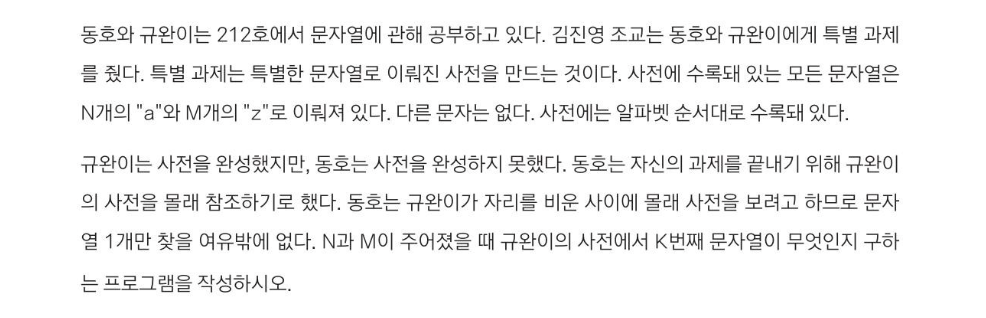

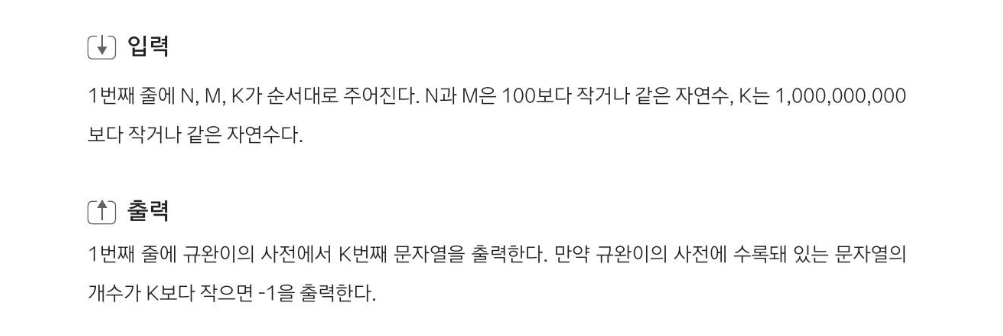

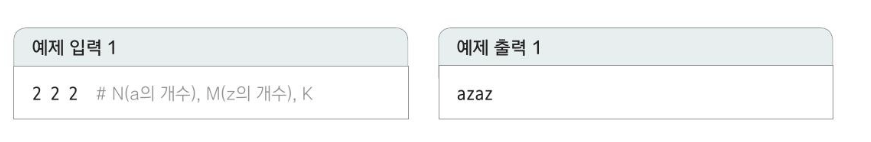

##### 문제 풀이

1. 조합의 경우의 수를 나타내는 DP 테이블을 초기화하고, 점화식으로 값을 계산해 저장

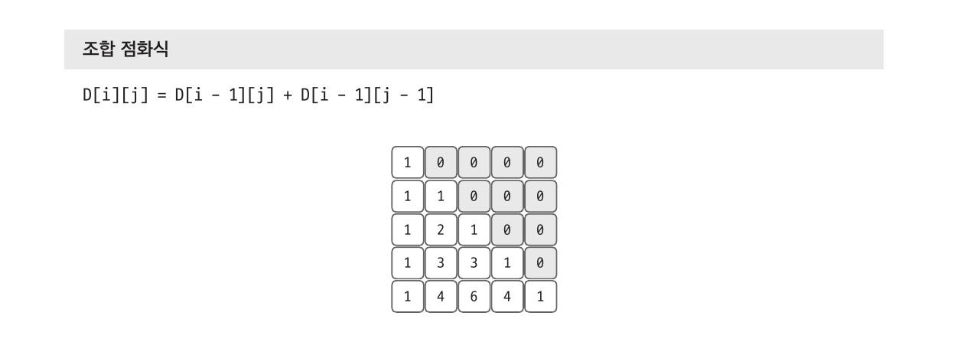

2. 몇 번째 문자열을 표현해야 하는지를 나타내는 변수를 K라고 하고, 현재 자릿수에서 a를 선택했을 때 남아 있는 
문자들로 만들 수 있는 모든 경우의 수를 T라고 지정한다.
- T와 K를 비교해 문자를 선택한다.

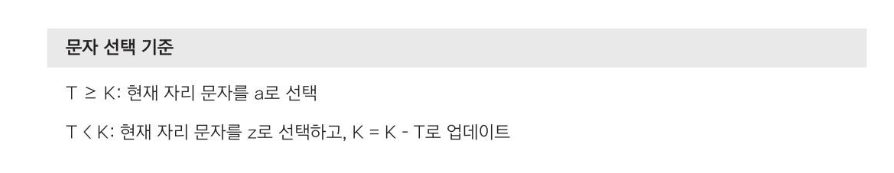

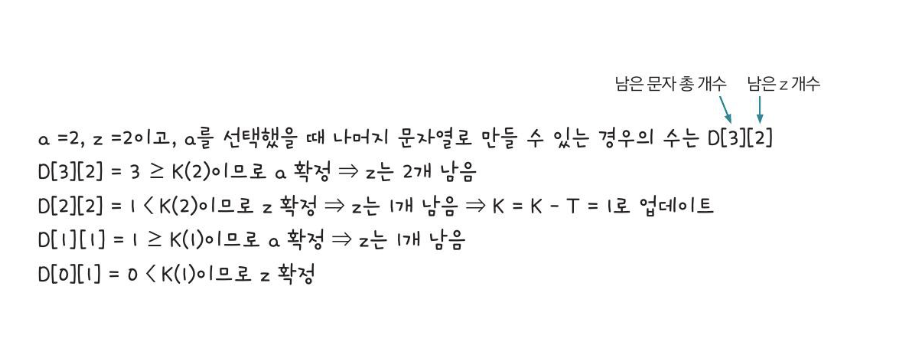

3. 과정 2를 a와 z의 문자들의 수를 합친 만큼 반복해 정답 문자열을 출력한다.
    - 확정된 문자를 차례대로 출력 ⇒ azaz

In [24]:
# 코드 입력

n, m, k = map(int, input().split()) # n, m, k를 공백으로 구분하여 입력받기
D = [[0 for j in range(202)] for i in range(202)] # DP 테이블 초기화

# 조합 계산
for i in range(0, 201): 
    for j in range(0, i+1):
        if j == 0 or j == i:
            D[i][j] = 1
        else:
            D[i][j] = D[i-1][j-1] + D[i-1][j]
            if D[i][j] > 1000000000:
                D[i][j] = 1000000000  # k  범위가 넘어가면 범위 최대값 저장
                
if D[n+m][m] < k: # k번째 조합이 없는 경우
    print(-1)
else:
    while not (n==0 and m==0):
        if D[n-1+m][m] >= k: # a를 선태하고도 남은 경우의 수가 K보다 크거나 같으면
            print('a', end='')
            n -= 1
        else: # a를 선택하고도 남은 경우의 수가 K보다 작으면
            print('z', end='')
            k -= D[n-1+m][m] # a를 선택하고도 남은 경우의 수를 빼준다.
            m -= 1
    
    

azaz